# 3.6 Lab: Linear Regression
## 3.6.1 Libraries
In python, there are usually two libraries for statistical learning: `statsmodels` and `scikit-learn`. There are some differences between these two packages, which I will show by wielding both of them to do the linear regression.

Of course, `pandas` is the packages that is used to deal with the data, and `matplotlib` as well as its descendants `seaborn` and `plotnine` are used to do the visualization of the data.

First we need to load the data by using `pd.read_csv()` function.

In [11]:
import pandas as pd

In [12]:
boston = pd.read_csv('data/Boston.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 3.6.2 Simple Linear Regression
The `boston` data set records `medv` (median house value) for 506 neighborhoods around Boston. 

In [13]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

To fit a simple linear regression model, we need to import `statsmodels` and `scikit-learn`.

In [14]:
import statsmodels.formula.api as smf
from sklearn import linear_model as lm
import numpy as np

We first use `medv` as the response and `lstat` as the predictor to fit a simple linear regression.

### Implementation by `statsmodels`
With formula api from `statsmodels`, the similar syntax to `lm(y~x, data)` in `R` can be used.

In [15]:
lm_fit = smf.ols('medv~lstat', data=boston).fit()

We can use `lm_fit.summary()` function to get more detailed information, such *p*-values and standard errors for the coefficients, the $R^2$ statistic and F-statistic for the model.

In [16]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           5.08e-88
Time:                        09:32:45   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To exstract the coefficients, we can use the `lm_fit.params` attribute:

In [17]:
lm_fit.params

Intercept    34.553841
lstat        -0.950049
dtype: float64

In order to obtain a confidence interval for the coefficient estimates, we can use `lm_fit.conf_int()` function:

In [18]:
lm_fit.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


The `lm_fit.predict(exog)` function can be used to produce the predicted responses for a given values of `lstat`:

In [19]:
lm_fit.predict({'lstat': [5, 10, 15]})

0    29.803594
1    25.053347
2    20.303101
dtype: float64

However, `lm_fit.predict()` function doesn't give the information about the confidence intervals and prediction intervals for the prediction of `medv` for a given value of `lstat`.

To achieve the above goal, we can use the `lm_fit.get_prediction(exog)` function.

In [20]:
lm_pred = lm_fit.get_prediction(exog={'lstat': np.array([5,10,15])})
lm_pred.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


In the result shown above, **mean_ci_lower** and **mean_ci_upper** corresponds to the confidence interval, and **obs_ci_lower** and **obs_ci_upper** to the prediction interval. So the 95% confidence interval asociated with a `lstat` value of 10 is (24.47132, 25.632563), and the 95% prediction interval is (12.827626, 37.279068).

Now we will plot `medv` and `lstat` along with the least squares regression line. In `seaborn` there isn't a similar plot function `abline` to `R`, but we can use `abline_plot` from `statsmodels`.

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

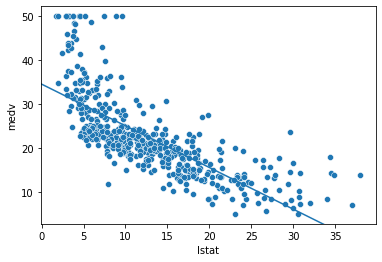

In [39]:
sns.scatterplot(x='lstat', y='medv', data=boston)
sm.graphics.abline_plot(model_results=lm_fit, 
                        ax=plt.gca());

In fact, `seaborn` provides an easy function `sns.regplot()` or `sns.lmplot()` which can be used to plot data and a linear regression model fit.

<AxesSubplot:xlabel='lstat', ylabel='medv'>

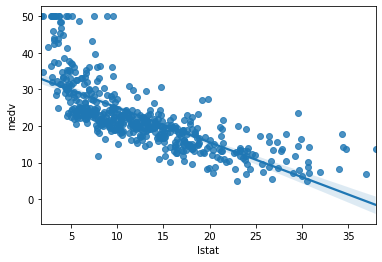

In [25]:
sns.regplot(x='lstat', y='medv', data=boston)

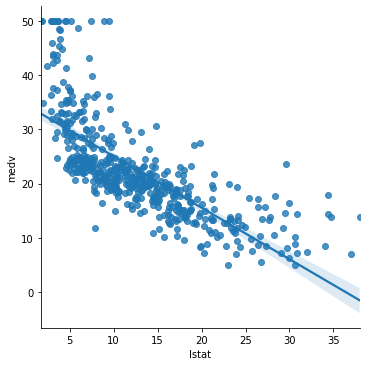

In [26]:
sns.lmplot(x='lstat', y='medv', data=boston)

In addition, there is a `plot_fit()` function in the `statsmodels` which can produce a graph with the scatterplot of observed values compared to fitted values.

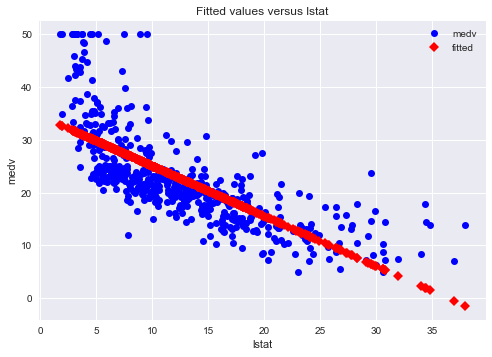

In [41]:
plt.style.use('seaborn')
sm.graphics.plot_fit(lm_fit, 'lstat', vlines=False);

To examine some diagnostic plots, we need to do some more works due to the lack of built-in function as `plot(lm.fit)`. To recreate the same results as `plot(lm.fit)`, we need to do it by ourselves. Most of the work comes from [here](https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/).

First we create the **Residuals vs Fitted** plot, which is used to show whether there are any non-linear patterns in the residuals, and thus in the data as well.

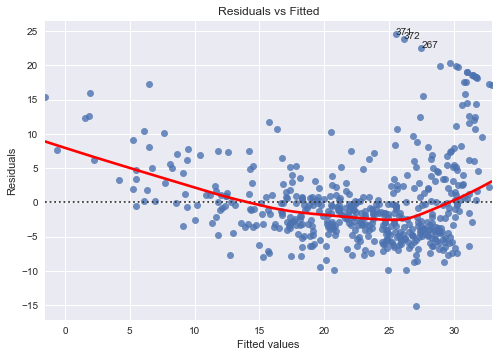

In [63]:
fitted_y = lm_fit.fittedvalues
resid_graph = sns.residplot(x=fitted_y
                           ,y=boston['medv']
                           ,lowess=True
                           ,line_kws={'color': 'r'})
resid_graph.set(title='Residuals vs Fitted'
               ,xlabel='Fitted values'
               ,ylabel='Residuals')
model_resid = lm_fit.resid
model_abs_resid = np.abs(model_resid).sort_values(ascending=False)
model_abs_resid_top3 = model_abs_resid[:3]
for i in model_abs_resid_top3.index:
    resid_graph.annotate(i, xy=(fitted_y[i]
                               ,model_resid[i]))

Next we will plot the **Q-Q Plot**, which shows whether the residuals are normally distributed. A good normal QQ plot has all of the residuals lying on or close to the red line.

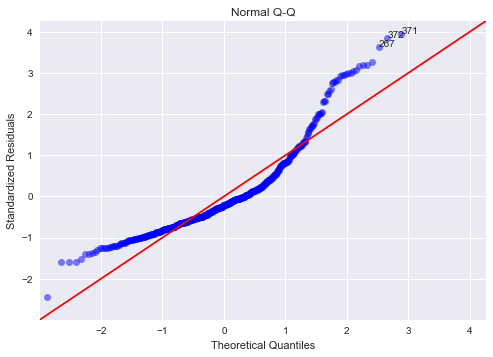

In [85]:
plt.style.use('seaborn')
from statsmodels.graphics.gofplots import ProbPlot
model_normal_resid = lm_fit.get_influence().resid_studentized_internal
QQ = ProbPlot(model_normal_resid)
qq_graph = QQ.qqplot(line='45', alpha=0.5)
qq_graph.axes[0].set(title='Normal Q-Q'
                    ,xlabel='Theoretical Quantiles'
                    ,ylabel='Standardized Residuals')
abs_norm_resid = np.flip(np.argsort(np.abs(model_normal_resid)), 0)
abs_norm_resid_top3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top3):
    qq_graph.axes[0].annotate(i,
                              xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                  model_normal_resid[i]));

Now it's time to plot the **Scale-Location** figure to to check if the residuals suffer from non-constant variance, aka heteroscedasticity.

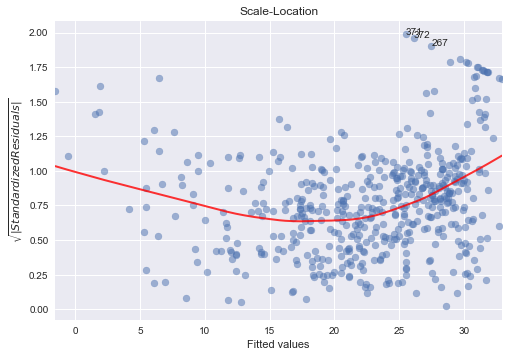

In [98]:
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_normal_resid))
model_leverage = lm_fit.get_influence().hat_matrix_diag
sl_graph = plt.figure()
plt.scatter(fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(x=fitted_y, y=model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8});
sl_graph.axes[0].set(title='Scale-Location'
                    ,xlabel='Fitted values'
                    ,ylabel='$\sqrt{|Standardized Residuals|}$')
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top3:
  sl_graph.axes[0].annotate(i,
                            xy=(fitted_y[i],
                                model_norm_residuals_abs_sqrt[i]));


Last we will create the **Residuals vs Leverage** plot, which can identify the problematic observations with high leverage.

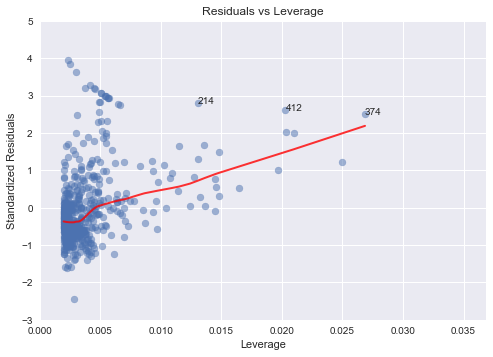

In [105]:
model_leverage = lm_fit.get_influence().hat_matrix_diag
model_cooks = lm_fit.get_influence().cooks_distance[0]
rl_graph = plt.figure();
plt.scatter(model_leverage, model_normal_resid, alpha=0.5);
sns.regplot(x=model_leverage, y=model_normal_resid,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8});
rl_graph.axes[0].set(xlim=(0, max(model_leverage)+0.01)
                    ,ylim=(-3,5)
                    ,title='Residuals vs Leverage'
                    ,xlabel='Leverage'
                    ,ylabel='Standardized Residuals')

leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
  rl_graph.axes[0].annotate(i,
                            xy=(model_leverage[i],
                                model_normal_resid[i]));

To simplify the problem, we can get the residuals from a linear regression fit by `lm_fit.resid`, and predicted response values by `lm_fit.fittedvalues`. With these two parameters, we can plot the **Residual vs Fitted** figure using `plt.scatter()` function.

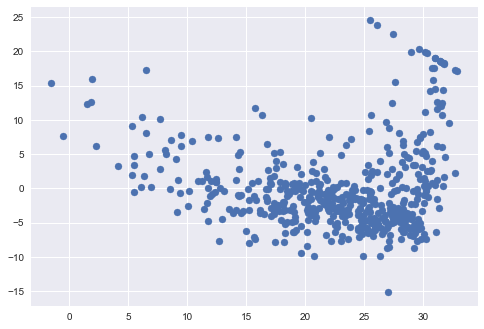

In [108]:
plt.scatter(lm_fit.fittedvalues, lm_fit.resid);

By using `lm_fit.outlier_test()` function, we can get the studentized residuals.

In [113]:
outlier = lm_fit.outlier_test()
outlier

,student_resid,unadj_p,bonf(p)
0,-0.938639,0.348367,1.0
1,-0.687511,0.492078,1.0
2,0.640666,0.522031,1.0
3,0.264236,0.791706,1.0
4,1.081882,0.279823,1.0
...,...,...,...
501,-0.477502,0.633212,1.0
502,-0.857915,0.391348,1.0
503,-0.853387,0.393851,1.0
504,-1.031090,0.302994,1.0


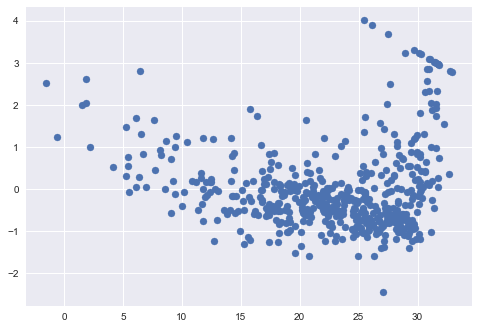

In [114]:
plt.scatter(lm_fit.fittedvalues, outlier['student_resid']);

We can use the `plot_leverage_resid2()` function to plot  leverage statistics vs. normalized residuals squared, from which we can get the observation with the largest leverage statistic.

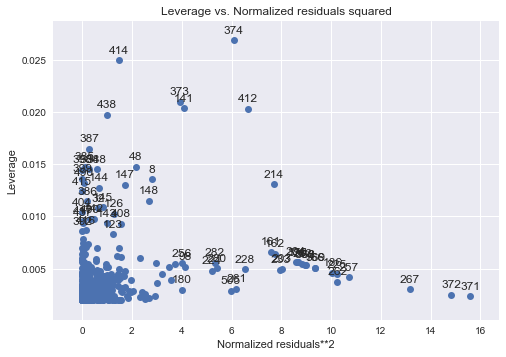

In [118]:
sm.graphics.plot_leverage_resid2(lm_fit);

### Implementation by `scikit-learn`
The following only shows some basic usage of `scikit-learn`

In [120]:
from sklearn import linear_model as lm

In [135]:
reg = lm.LinearRegression()
X = np.array(boston['lstat']).reshape(-1,1)
y = np.array(boston['medv'])
reg.fit(X, y)
reg.intercept_, reg.coef_

(34.5538408793831, array([-0.95004935]))

In [139]:
# The R-squared statistic
reg.score(X, y)

0.5441462975864797

In [142]:
# Make some predictions
reg.predict([[5],[10],[15]])

array([29.80359411, 25.05334734, 20.30310057])

From the above example we can see that `statsmodels` can work together with `pandas` better than `scikit-learn`. Besides, `statsmodels` has more built-in statistical assessment about the fitting, so in the following example, we will focus on the usage of `statsmodels`.

## 3.6.3 Multiple Linear Regression
To fit a multiple linear regression model using least squares, the only change we need to make is the formula passed to the `smf.ols()` function.

In [144]:
lm_fit = smf.ols('medv~lstat+age', data=boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           2.98e-88
Time:                        16:29:36   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To perform a regression using all of the predictors, we need to construct the formula manually, without any short-hand.

In [145]:
formula = ' + '.join(boston.columns[:-1])
lm_fit = smf.ols(f'medv~{formula}', data=boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          6.72e-135
Time:                        16:38:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Get the $R^2$ statistics:

In [148]:
lm_fit.rsquared

0.7406426641094094

Compute the residual standard error (**RSE**):

In [155]:
SSR = lm_fit.ssr
p = len(boston.columns[:-1])
n = len(boston)
RSE = np.sqrt(SSR/(n-p-1))
RSE

4.745298181699631

We can use `statsmodels.stats.outliers_influence.variance_inflation_factor` to compute the variance inflation factors.

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X = boston.iloc[:,:-1]
exog = sm.add_constant(X.values)   # This is important!
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [vif(exog, i+1) 
                   for i in range(len(X.columns))]
vif_data

,features,VIF
0,crim,1.792192
1,zn,2.298758
2,indus,3.991596
3,chas,1.073995
4,nox,4.393720
5,rm,1.933744
6,age,3.100826
7,dis,3.955945
8,rad,7.484496
9,tax,9.008554


If we would like to perform a regression using all of the variables but one, we can use the `difference` method to remove the variables that we don't want. 

In [206]:
formula = ' + '.join(boston.columns[:-1].difference(['age', 'indus']))
lm_fit1 = smf.ols(f'medv~{formula}', data=boston).fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          5.54e-137
Time:                        21:04:15   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
black          0.0093      0.003      3.475      0.001       0.004       0.015
chas           2.7187      0.854      3.183      0.002       1.040       4.397
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
rad            0.2996      0.063      4.726      0.000       0.175       0.424
rm             3.8016      0.406      9.356      0.000       3.003       4.600
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
zn             0.0458      0.014      3.390      0.001       0.019       0.072
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.6.4 Interaction Terms
To include interaction terms in a linear model, use the sytax `lstat*age`, which simultaneously includes `lstat`, `age` and the interaction term `lstat X age` as predictors. It is a shorthand for `lstat + age + lstat:age`, in which the syntax `lstat:black` means an interaction term between `lstat` and `black`.

In [208]:
lm_fit = smf.ols('medv~lstat*age', data=boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           4.86e-88
Time:                        21:16:31   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.6.5 Non-linear Transformations of the Predictors
To accomodate non-linear transformations of the predictors, we can use the corresponding function from `numpy`. For example, to create a predictor $X^2$, we can use `np.power(X, 2)`. We cannot use `lstat**2` or `lstat^2`, since `*` and `^` both has a special meaning in a formula.

In [216]:
lm_fit2 = smf.ols('medv~lstat+np.power(lstat, 2)', data=boston).fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          1.56e-112
Time:                        21:27:42   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Of course, you can do the transformation manually and explicitly:

In [218]:
boston_copy = boston.copy()
boston_copy['lstat_2'] = boston_copy['lstat']**2
(smf.ols('medv~lstat+lstat_2', data=boston_copy)
    .fit()
    .summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          1.56e-112
Time:                        21:32:20   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.8620      0.872     49.149      0.000      41.149      44.575
lstat         -2.3328      0.124    -18.843      0.000      -2.576      -2.090
lstat_2        0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can do an ANOVA check to further quantify the extent to which the quadratic fit is superior to the linear fit:

In [219]:
from statsmodels.stats.api import anova_lm
lm_fit = smf.ols('medv~lstat', data=boston).fit()
anova_lm(lm_fit, lm_fit2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


We can plot the **Residuals vs Fitted** figure, and then we see that when the $lstat^2$ term is included in the model, there is little discernible pattern in the residuals.

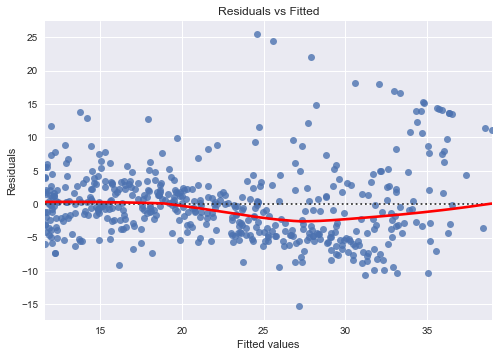

In [223]:
sns.residplot(x=lm_fit2.fittedvalues
             ,y=boston['medv']
             ,lowess=True
             ,line_kws={'color':'red'})
plt.gca().set(title='Residuals vs Fitted'
             ,xlabel='Fitted values'
             ,ylabel='Residuals');

To do a polynomial fit, we can add a predictor such as `np.power(lstat,3)` to the formula. However, this approach is cumbersome for higher-order polynomials. We can define a custom function `poly()` to create the polynomial and use it in the formula.

In [238]:
def poly(X, n):
    return '+'.join(f'np.power({X},{i})' 
                    for i in range(1, n+1))

In [245]:
lm_fit5 = smf.ols(f'medv~{poly("lstat", 5)}', data=boston).fit()
lm_fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          8.73e-122
Time:                        22:21:17   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
np.power(lstat, 1)   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Of course, we can use other form of transformation such as `log` transformation.

In [246]:
lm_fit_log = smf.ols('medv~np.log(rm)', boston).fit()
lm_fit_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.22e-64
Time:                        22:22:57   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.6.6 Qualitative Predictors
For this section, we use the **Carseats** data. So first we need to load the data

In [247]:
carseats = pd.read_csv('data/Carseats.csv')
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [250]:
carseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

We can see that the **Carseats** data includes qualitative predictors such as **ShelveLoc**, an indicator of the quality of the shelving location - that is, the space within a store in which the car seat is displayed - at each location. 

In `statsmodels`, dummy variables will be created automaticaly given a qualitative variable such as **ShelveLoc**.

In [255]:
formula = '+'.join(carseats.columns.difference(['Sales']))
lm_fit = smf.ols((f'Sales~{formula}'
                  '+Income:Advertising'
                  '+Price:Age'), carseats).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          6.14e-166
Time:                        22:36:19   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The `pd.get_dummies()` function gives the dummy/indicator variables for a given categorical variable.

In [261]:
pd.get_dummies(carseats['ShelveLoc'])

,Bad,Good,Medium
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
395,0,1,0
396,0,0,1
397,0,0,1
398,1,0,0
